# Sampling Bias Quantification

## Quantifying the impact of sampling on the description of a distribution
On Tuesday 14th December 2021, I attended the "Concept drift, detect & fix. My data are better than your algorithms" meetup by Yohann Le Faou.
This very interesting meetup trigerred a question: what bias do we introduce when we sample a distribution?

To answer this question I built this small Python notebook.
The ideia is to sample twice a distribution and assess the impact of the number of sample points on the distance between the two new distributions.
In this case, I used a normal distributions and the Wasserstein distance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
from scipy.stats import wasserstein_distance

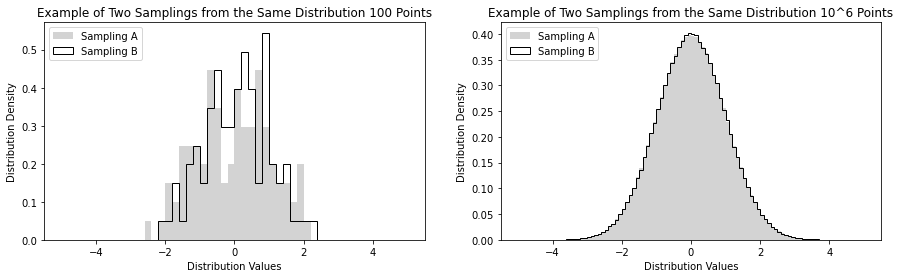

In [2]:
# Set the number of points per random variable n_points
n_points = 1_000_000

# Generate n_variables*n_points random uniform values
df = pd.DataFrame(np.random.uniform(size=(2,n_points)))

# Apply the inverse cumulative distribution function (ICDF) to generate the desired distributions
df = pd.DataFrame(norm.ppf(df))

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4));

# Plot the 100 point sampling
bins = range(-25, 26)
bins = [number / 5 for number in bins]
ax1.hist(df.loc[0,:100], bins=bins, density=True, color='lightgrey', label="Sampling A");
ax1.hist(df.loc[1,:100], bins=bins, density=True, histtype='step', color='black', label="Sampling B");
ax1.set_title("Example of Two Samplings from the Same Distribution 100 Points");
ax1.set_xlabel("Distribution Values");
ax1.set_ylabel("Distribution Density");
ax1.legend(loc="upper left");

# Plot the 10^6 point sampling
bins = range(-50, 51)
bins = [number / 10 for number in bins]
ax2.hist(df.loc[0,:], bins=bins, density=True, color='lightgrey', label="Sampling A");
ax2.hist(df.loc[1,:], bins=bins, density=True, histtype='step', color='black', label="Sampling B");
ax2.set_title("Example of Two Samplings from the Same Distribution 10^6 Points");
ax2.set_xlabel("Distribution Values");
ax2.set_ylabel("Distribution Density");
ax2.legend(loc="upper left");

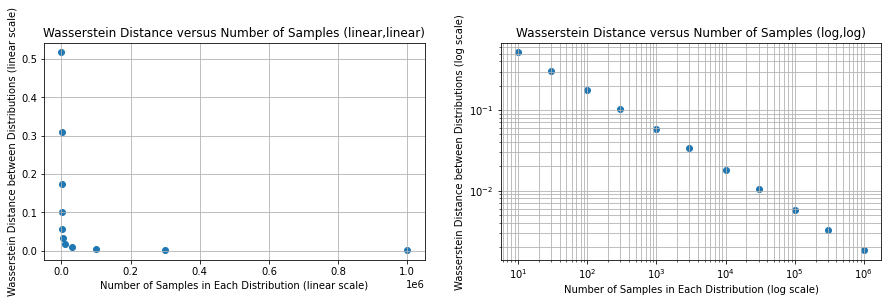

In [3]:
N = [10,30,100,300,1000,3000,10_000,30_000,100_000,300_000,1_000_000]
All_distances=pd.DataFrame([])
for i in range(1000):
    distances=[]
    for n in N:
        df = pd.DataFrame(np.random.uniform(size=(2,n)))
        df = pd.DataFrame(norm.ppf(df))
        distances.append(wasserstein_distance(df.loc[0,:], df.loc[1,:]))
    All_distances=pd.concat([All_distances,pd.DataFrame(distances).T])

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4));
ax1.set_title("Wasserstein Distance versus Number of Samples (linear,linear)");

ax1.set_xlabel("Number of Samples in Each Distribution (linear scale)");
ax1.set_ylabel("Wasserstein Distance between Distributions (linear scale)");
ax1.grid(visible=True, which='both');
ax1.scatter(N, All_distances.mean());

ax2.set_xscale('log');
ax2.set_yscale('log');
ax2.set_title("Wasserstein Distance versus Number of Samples (log,log)");
ax2.set_xlabel("Number of Samples in Each Distribution (log scale)");
ax2.set_ylabel("Wasserstein Distance between Distributions (log scale)");
ax2.grid(visible=True, which='both');
ax2.scatter(N, All_distances.mean());

## Conclusions and way forward
The data seem to suggest a (log,log) linear relationship between the number of samples and the distance between distributions.

The way forward would be to try the same workflow on other distributions such as log normal etc...